# ***Clinical Data Pipeline Automation***

Author: Lulu Osofisan

In [2]:
import pandas as pd
import numpy as np

# Simulated raw data
raw = pd.DataFrame({
    "patient_id": range(1,6),
    "visit_date": ["2025-01-01", "2025-01-03", "2025-01-03", None, "2025-01-05"],
    "diagnosis": ["A12", "B44", None, "A12", "C90"],
    "billed_amount": [200, 150, 400, 250, None]
})

print("Raw data:")
display(raw)


Raw data:


,patient_id,visit_date,diagnosis,billed_amount
0,1,2025-01-01,A12,200.0
1,2,2025-01-03,B44,150.0
2,3,2025-01-03,None,400.0
3,4,None,A12,250.0
4,5,2025-01-05,C90,NaN


In [3]:
# Step 1: Clean nulls
cleaned = raw.dropna(subset=["visit_date", "diagnosis", "billed_amount"])
print("\n Cleaned data:")
display(cleaned)


 Cleaned data:


,patient_id,visit_date,diagnosis,billed_amount
0,1,2025-01-01,A12,200.0
1,2,2025-01-03,B44,150.0


In [4]:
# Step 2: Transform (add derived columns)
cleaned["visit_date"] = pd.to_datetime(cleaned["visit_date"])
cleaned["month"] = cleaned["visit_date"].dt.month
cleaned["billed_amount_usd"] = cleaned["billed_amount"] * 1.00

print("\n Transformed data:")
display(cleaned)


 Transformed data:


/tmp/ipython-input-993539417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["visit_date"] = pd.to_datetime(cleaned["visit_date"])
/tmp/ipython-input-993539417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["month"] = cleaned["visit_date"].dt.month
/tmp/ipython-input-993539417.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

,patient_id,visit_date,diagnosis,billed_amount,month,billed_amount_usd
0,1,2025-01-01,A12,200.0,1,200.0
1,2,2025-01-03,B44,150.0,1,150.0


In [5]:
# Step 3: Simple validation
assert cleaned["billed_amount_usd"].notna().all(), "Missing billed amounts"
print("\n validation passed!")


 validation passed!


In [6]:
#Step 4: Simulated output (write to CSV)
cleaned.to_csv("cleaned_data.csv", index=False)
print("\n Data saved to cleaned_data.csv")


 Data saved to cleaned_data.csv


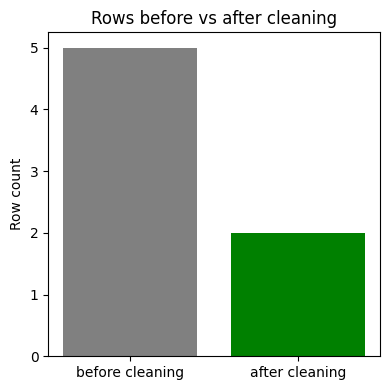

In [7]:
import matplotlib.pyplot as plt

# e.g., visualize number of rows before vs after cleaning
before_count = raw.shape[0]
after_count = cleaned.shape[0]

plt.figure(figsize=(4,4))
plt.bar(["before cleaning", "after cleaning"], [before_count, after_count], color=["gray","green"])
plt.title("Rows before vs after cleaning")
plt.ylabel("Row count")
plt.tight_layout()
plt.savefig("rows_before_after.png")
plt.show()
